<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/conda_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://github.com/jckantor/CBE30338/tree/master/notebooks

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.5g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')

%load_ext autoreload
%autoreload 2

# !pip install -q condacolab
# import condacolab
# condacolab.install()

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:38
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge pyomo
!conda install -c conda-forge pyomo.extras
!conda install -c conda-forge ipopt

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pyomo


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37h89c1867_2         145 KB  conda-forge
    conda-4.12.0               |   py37h89c1867_0         1.0 MB  conda-forge
    libgcc-ng-11.2.0           |      h1d223b6_15         911 KB  conda-forge
    libgomp-11.2.0             |      h1d223b6_15         432 KB  conda-forge
    libstdcxx-ng-11.2.0        |      he4da1e4_15         4.2 MB  conda-forge
    openssl-1.1.1n             |       h166bdaf_0         2.1 MB  conda-forge
    ply-3.11                   |             py_1   

In [2]:
import pyomo.environ as pyo

In [4]:
dir(pyo)

['AbstractModel',
 'AlphaNumericTextLabeler',
 'Any',
 'AnyWithNone',
 'Binary',
 'Block',
 'Boolean',
 'BooleanConstant',
 'BooleanSet',
 'BooleanValue',
 'BooleanVar',
 'BooleanVarList',
 'BuildAction',
 'BuildCheck',
 'CNameLabeler',
 'Component',
 'ComponentMap',
 'ComponentUID',
 'ConcreteModel',
 'Connector',
 'Constraint',
 'ConstraintList',
 'CounterLabeler',
 'CuidLabeler',
 'DataPortal',
 'EmptySet',
 'Expr_if',
 'Expression',
 'ExternalFunction',
 'IntegerInterval',
 'IntegerSet',
 'Integers',
 'LogicalConstraint',
 'LogicalConstraintList',
 'Model',
 'ModelComponentFactory',
 'NameLabeler',
 'NegativeIntegers',
 'NegativeReals',
 'NonNegativeIntegers',
 'NonNegativeReals',
 'NonPositiveIntegers',
 'NonPositiveReals',
 'NumericLabeler',
 'NumericValue',
 'Objective',
 'ObjectiveList',
 'Param',
 'PercentFraction',
 'Piecewise',
 'PositiveIntegers',
 'PositiveReals',
 'PyomoObject',
 'PyomoOptions',
 'RangeSet',
 'RealInterval',
 'RealSet',
 'Reals',
 'Reference',
 'SOSConstr

In [5]:
dir(pyo.pyomo)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'checker',
 'common',
 'contrib',
 'core',
 'dae',
 'dataportal',
 'duality',
 'environ',
 'gdp',
 'mpec',
 'neos',
 'network',
 'opt',
 'repn',
 'scripting',
 'solvers',
 'util',
 'version']

In [8]:
dir(pyo.pyomo.solvers)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'mockmip',
 'plugins']

In [12]:
dir(pyo.pyomo.solvers)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'mockmip',
 'plugins']

In [13]:
from pyomo.opt import SolverFactory

In [14]:
SolverFactory('glpk').available() == True

False

In [46]:
SolverFactory('conopt').available() == True

False

In [51]:
SolverFactory('mpec_minlp').available() == True

True

In [24]:
import pyomo.environ as pyo
from itertools import compress

pyomo_solvers_list = pyo.SolverFactory.__dict__['_cls'].keys()
pyomo_solvers_list

dict_keys(['_neos', 'cbc', '_cbc_shell', '_mock_cbc', 'glpk', '_glpk_shell', '_mock_glpk', 'cplex', '_cplex_shell', '_mock_cplex', 'gurobi_direct', 'gurobi', '_gurobi_shell', 'baron', 'asl', '_mock_asl', 'py', 'scip', 'conopt', 'xpress', 'ipopt', 'gurobi_persistent', 'cplex_direct', 'cplex_persistent', 'gams', '_gams_direct', '_gams_shell', 'mosek', 'mosek_direct', 'mosek_persistent', 'xpress_direct', 'xpress_persistent', 'mpec_nlp', 'mpec_minlp', 'path', 'appsi_gurobi', 'appsi_cplex', 'appsi_ipopt', 'appsi_cbc', 'gdpbb', 'gdpopt', 'contrib.gjh', 'mindtpy', 'multistart', 'cyipopt', 'trustregion'])

In [ ]:
# pyomo_solvers_list = pyo.SolverFactory.__dict__['_cls'].keys()
# solvers_filter = []
# for s in pyomo_solvers_list:
#     try:
#         solvers_filter.append(pyo.SolverFactory(s).available())
#     except (ApplicationError, NameError, ImportError) as e:
#         solvers_filter.append(False)
# pyomo_solvers_list = list(compress(pyomo_solvers_list,solvers_filter))

In [34]:
model = pyo.ConcreteModel()
model.x1 = pyo.Var(bounds=(1,5),initialize=1.0)
model.x2 = pyo.Var(bounds=(1,5),initialize=5.0)
model.x3 = pyo.Var(bounds=(1,5),initialize=5.0)
model.x4 = pyo.Var(bounds=(1,5),initialize=1.0)
model.obj = pyo.Objective(
expr=model.x1*model.x4*(model.x1 + model.x2 + model.x3) + model.x3)
model.inequality = pyo.Constraint(
expr=model.x1*model.x2*model.x3*model.x4 >= 25.0)
model.equality = pyo.Constraint(
expr=model.x1**2 + model.x2**2 + model.x3**2 + model.x4**2 == 40.0)
### Declare all suffixes
# Ipopt bound multipliers (obtained from solution)
model.ipopt_zL_out = pyo.Suffix(direction=pyo.Suffix.IMPORT)
model.ipopt_zU_out = pyo.Suffix(direction=pyo.Suffix.IMPORT)

In [78]:
# Ipopt bound multipliers (sent to solver)
model.ipopt_zL_in = pyo.Suffix(direction=pyo.Suffix.EXPORT)
model.ipopt_zU_in = pyo.Suffix(direction=pyo.Suffix.EXPORT)
# Obtain dual solutions from first solve and send to warm start
model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT_EXPORT)
ipopt = pyo.SolverFactory('ipopt')
# ipopt.options["threads"] = 4

    'pyomo.core.base.suffix.Suffix'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.suffix.Suffix'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.suffix.Suffix'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.suffix.Suffix'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.suffix.Suffix'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.suffix.Suffix'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().


In [81]:
# ipopt.solve(model, tee=True)

results = ipopt.solve(model,  tee=True)


Ipopt 3.14.5: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.5, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        4
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        4
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number o

In [60]:
model = pyo.ConcreteModel()
model.x1 = pyo.Var(bounds=(1,5),initialize=1.0)
model.x2 = pyo.Var(bounds=(1,5),initialize=5.0)
model.x3 = pyo.Var(bounds=(1,5),initialize=5.0)
model.x4 = pyo.Var(bounds=(1,5),initialize=1.0)
model.obj = pyo.Objective(
expr=model.x1*model.x4*(model.x1 + model.x2 + model.x3) + model.x3)
model.inequality = pyo.Constraint(
expr=model.x1*model.x2*model.x3*model.x4 >= 25.0)
model.equality = pyo.Constraint(
expr=model.x1**2 + model.x2**2 + model.x3**2 + model.x4**2 == 40.0)

mpec_nlp = pyo.SolverFactory('mpec_nlp')

In [61]:
mpec_nlp.solve(model, tee=True)

Ipopt 3.14.5: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.5, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        4
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:       10

Total number of variables............................:        4
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        4
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number o

{'Problem': [{'Name': 'unknown', 'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 4, 'Number of binary variables': None, 'Number of integer variables': None, 'Number of continuous variables': None, 'Sense': 'unknown'}], 'Solver': [{'Name': None, 'Status': 'ok', 'Wallclock time': 0.053299665451049805, 'Termination condition': 'unknown'}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [70]:
!pyomo help -s



Pyomo Solvers and Solver Managers
---------------------------------
Pyomo uses 'solver managers' to execute 'solvers' that perform
optimization and other forms of model analysis.  A solver directly
executes an optimizer, typically using an executable found on the
user's PATH environment.  Solver managers support a flexible mechanism
for asyncronously executing solvers either locally or remotely.  The
following solver managers are available in Pyomo:

    neos       Asynchronously execute solvers on the NEOS server
    serial     Synchronously execute solvers locally

If no solver manager is specified, Pyomo uses the serial solver
manager to execute solvers locally.  The neos solver manager is used
to execute solvers on the NEOS optimization server.


Serial Solver Interfaces
------------------------
The serial manager supports the following solver interfaces:

    appsi_cbc                   Automated persistent interface to Cbc
    appsi_cplex                 Automated persistent int

In [83]:
!pyomo solve --help

usage: pyomo solve [options] <model_or_config_file> [<data_files>]

positional arguments:
  model_or_config_file  A Python module that defines a Pyomo model, or a
                        configuration file that defines options for 'pyomo
                        solve' (in either YAML or JSON format)
  data_files            Pyomo data files that defined data used to initialize
                        the model (specified in the first argument)

optional arguments:
  -h, --help            show this help message and exit
  --generate-config-template TEMPLATE
                        Create a configuration template file in YAML or JSON
                        and exit.
  --solver SOLVER       Solver name. This option is required unless the solver
                        name is specified in a configuration file.

Description:

The 'pyomo solve' subcommand optimizes a Pyomo model.  The --solver option
is required because the specific steps executed are solver dependent.
The standard steps ex

In [1]:
%matplotlib inline
from itertools import chain
import logging
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from scipy.interpolate import interp2d
from scipy.integrate import odeint

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [2]:
def mpc_double_integrator(N=2, h=1):
    m = ConcreteModel()
    m.states = RangeSet(1, 2)
    m.k = RangeSet(0, N)
    
    m.h = Param(initialize=h, mutable=True)
    m.ic = Param(m.states, initialize={1:0.5, 2:0.5}, mutable=True)
    m.gamma = Param(default=0.5, mutable=True)
    
    m.x = Var(m.states, m.k)
    m.icfix = Constraint(m.states, rule = lambda m, i: m.x[i,0] == m.ic[i])
    m.x[1,N].fix(0)
    m.x[2,N].fix(0)
    
    m.u = Var(m.k, bounds=(-1, 1))
    m.upos = Var(m.k, bounds=(0, 1))
    m.uneg = Var(m.k, bounds=(0, 1))
    m.usum = Constraint(m.k, rule = lambda m, k: m.u[k] == m.upos[k] - m.uneg[k])   
  
    m.y = Var(m.k, bounds=(-1, 1))
    m.ypos = Var(m.k, bounds=(0, 1))
    m.yneg = Var(m.k, bounds=(0, 1))
    m.ysum = Constraint(m.k, rule = lambda m, k: m.y[k] == m.ypos[k] - m.yneg[k])

    m.x1_update = Constraint(m.k, rule = lambda m, k:
           m.x[1,k+1] == m.x[1,k] + m.h*m.x[2,k] + m.h**2*m.u[k]/2 if k < N else Constraint.Skip)
    m.x2_update = Constraint(m.k, rule = lambda m, k:
           m.x[2,k+1] == m.x[2,k] + m.h*m.u[k] if k < N else Constraint.Skip)
    m.y_output = Constraint(m.k, rule = lambda m, k: m.y[k] == m.x[1,k])
    
    m.uobj = m.gamma*sum(m.upos[k] + m.uneg[k] for k in m.k)
    m.yobj = (1-m.gamma)*sum(m.ypos[k] + m.yneg[k] for k in m.k)
    m.obj = Objective(expr = m.uobj + m.yobj, sense=minimize)
    
    return m

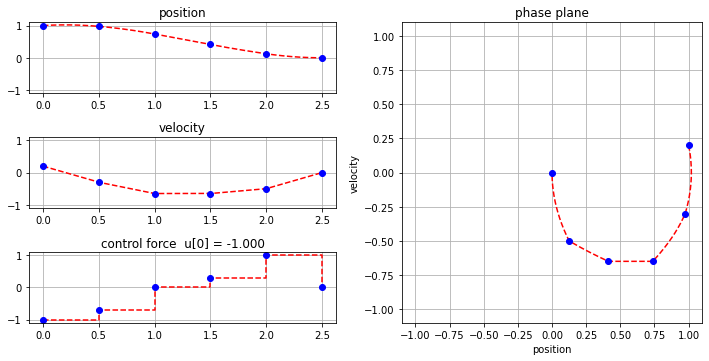

In [3]:
def plot_results(m):
    results = SolverFactory('cbc').solve(m)
    if str(results.solver.termination_condition) != "optimal":
        print(results.solver.termination_condition)
        return
    
    # solution data at sample times
    h = m.h()
    K = np.array([k for k in m.k])  
    u = [m.u[k]() for k in K]
    y = [m.y[k]() for k in K]
    v = [m.x[2,k]() for k in K]
    
    # interpolate between sample times
    t = np.linspace(0, h) 
    tp = [_ for _ in chain.from_iterable(k*h + t for k in K[:-1])]
    up = [_ for _ in chain.from_iterable(u[k] + t*0 for k in K[:-1])]
    yp = [_ for _ in chain.from_iterable(y[k] + t*(v[k] + t*u[k]/2) for k in K[:-1])]
    vp = [_ for _ in chain.from_iterable(v[k] + t*u[k] for k in K[:-1])]

    fig = plt.figure(figsize=(10,5))
    
    ax1 = fig.add_subplot(3, 2, 1)
    ax1.plot(tp, yp, 'r--', h*K, y, 'bo')
    ax1.set_title('position')

    ax2 = fig.add_subplot(3, 2, 3)
    ax2.plot(tp, vp, 'r--', h*K, v, 'bo')
    ax2.set_title('velocity')

    ax3 = fig.add_subplot(3, 2, 5)
    ax3.plot(np.append(tp, K[-1]*h), np.append(up, u[-1]), 'r--', h*K, u, 'bo')
    ax3.set_title('control force  u[0] = {0:<6.3f}'.format(u[0]))

    ax4 = fig.add_subplot(1, 2, 2)
    ax4.plot(yp, vp, 'r--', y, v, 'bo')
    ax4.set_xlim([-1.1, 1.1])
    ax4.set_aspect('equal', 'box')
    ax4.set_title('phase plane')
    ax4.set_xlabel('position')
    ax4.set_ylabel('velocity')
    
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_ylim(-1.1, 1.1)
        ax.grid(True)
    fig.tight_layout()

model = mpc_double_integrator(5, 0.5)
model.ic[1] = 1.0
model.ic[2] = 0.2

SolverFactory('cbc').solve(model)
plot_results(model)